<a href="https://colab.research.google.com/github/Sriharish19/EDA-Hotel-Booking-Capstone-Project-1/blob/main/SH_Hotel_Booking_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initialization
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

# Data frame mounting
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')
df1=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

Mounted at /content/drive


In [ ]:
# Counting the total null values in each columns
count = df1.isnull().sum()
#Percentage of total null values in each columns
percentage = round(count/df1.isnull().count(),4) *100
#concating the count and percentage
df_temp = pd.concat([count,percentage], axis = 1, keys = ['null_count', 'null_percent'])
df_temp

In [ ]:
df.head(15)

In [ ]:
df.shape

In [ ]:
df.info()

In [6]:
# DATA CLEANING -removing null values & changing children column to int type
df['children'] = df['children'].replace(np.nan, 0)
df['country'] = df['country'].replace(np.nan, 'no country')
df['agent'] = df['agent'].replace(np.nan, 0)
df.drop('company',axis=1,inplace=True)

df["children"]=df["children"].astype(int)

In [61]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [8]:
#Function to convert month_name to month_number

def num_month(month_name):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(n[m.index(month_name)])

#Function to convert single_digit_date to double_digit_date

def date_two_digit(single_digit_date):
  if single_digit_date<10:
    c=[1,2,3,4,5,6,7,8,9]
    d=['01','02','03','04','05','06','07','08','09']
    return(d[c.index(single_digit_date)])
  else:
    return(single_digit_date)

In [9]:
#Applying num_month function to df
df['month_num'] = df['arrival_date_month'].apply(num_month)
#Applying date_two_digit function to df
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].apply(date_two_digit)
#Assigning month_num to arrival_date_month
df['arrival_date_month'] = df['month_num']
#droping month_num
df.drop(['month_num'], axis = 1, inplace = True)

In [10]:
#Concating columns to get date in str format
df['date_'] = df['arrival_date_year'].astype(str)+ '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str) 

#Converting the date from str to DATE format 
df['date'] = pd.to_datetime(df.date_)

#droping temporary column
df.drop(['date_'], axis = 1,inplace=True)

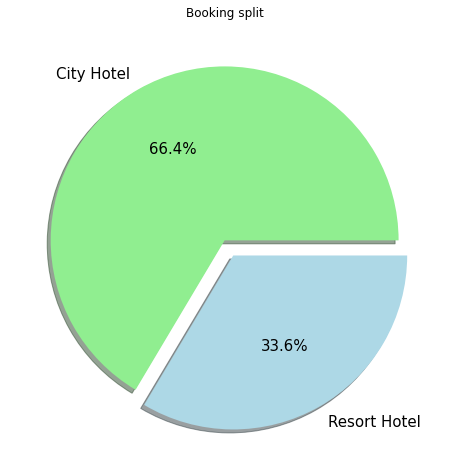

In [44]:
# Pie Chart representing Bookings 

values= df['hotel'].value_counts().tolist()
labe = df['hotel'].value_counts().index.tolist()

plt.pie(values ,labels=labe , radius=1,explode = [0,0.1],colors=['lightgreen','lightblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,7)
plt.title('Booking split')
plt.show()

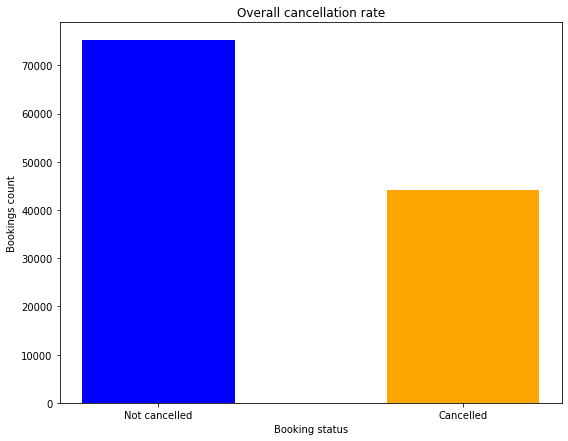

In [17]:
y=df['is_canceled'].value_counts().tolist()
z=['Not cancelled','Cancelled']
plt.ylabel('Bookings count')
plt.xlabel('Booking status')
plt.title('Overall cancellation rate')
plt.bar(z,y,width=0.5,color=['blue','orange'])
plt.rcParams['figure.figsize']=(9,7)
plt.show()

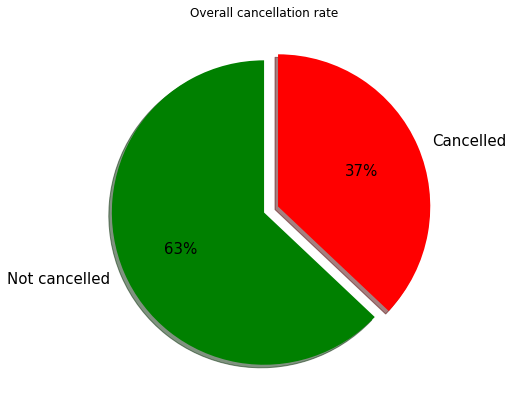

In [34]:
plt.pie(y ,labels=z ,explode = [0,0.1],colors=['green','red'],radius=1,startangle=90,textprops={'fontsize': 15}, autopct='%0.0f%%',shadow=True)
plt.title('Overall cancellation rate')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [59]:
#Extracting required columns

df_new= df[['hotel','is_canceled']]
dx=df_new.value_counts().tolist()
dy=['City Hotel','Resort Hotel']

#dx=[46228, 33102, 28938, 11122]

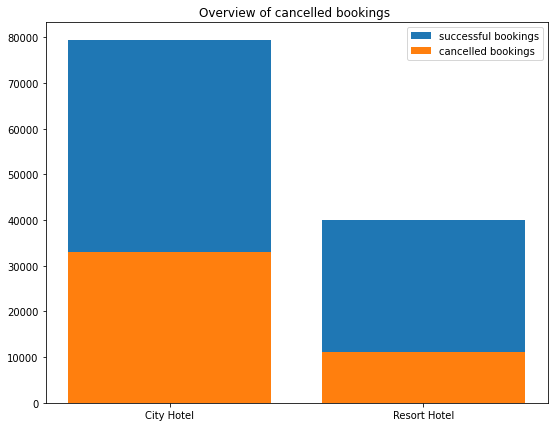

In [66]:
# Plotting Overview of cancelled bookings with repect to hotel types

yy=df['hotel'].value_counts().tolist()
plt.bar(dy,yy,label='successful bookings')
plt.bar(dy,dx[1::2],label='cancelled bookings')
plt.title('Overview of cancelled bookings ')
plt.legend()
plt.rcParams['figure.figsize']=(9,7)
plt.show()

In [150]:
def interchange(z):
  if z==0:
    return 1
  else:
    return 0

bb=df[['is_canceled','country']]
bb['is_canceled']=bb['is_canceled'].apply(interchange)
cx_country= bb[bb['is_canceled'] == 1].groupby(['country']).sum().reset_index()
cx_country.rename({'is_canceled':'cx_count'},axis=1,inplace=True)

# Importing  Plotly.express to plot a choropleth map
import plotly.express as px

fig=px.choropleth(cx_country, locations = 'country',color= "cx_count", hover_name= "country",scope='world',title="Home country of visitors")
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

